<h1><b>1 <span style='color:#19d063;'>|</span> Importing Libraries and Loading dataset</b></h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


plt.style.use('classic') 




This is dataset which is used to recommend the crop for the suitable soil. This will be very useful in crop production (Agriculture).</h4>

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Names and uses</b></p>
</div>
<ul>
    <li><h4 style="line-height:25px"><mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>Nitrogen</b></mark> is one of chemical elements that become a part of amino acids. Plants synthesize nitrogen from soils along with other primary elements and turn them into amino acids. These chemical compounds are utilized by plants to increase the production and quality of crops.</h4></li>
    <hr>
    <li><h4 style="line-height:25px;"><mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>Phosphorus</b></mark> plays a major role in the growth of new tissue and division of cells. Plants perform complex energy transmissions, a function that requires phosphorus.</h4></li>
    <hr>
    <li><h4 style="line-height:25px"><mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>Potassium</b></mark> is a paramount macro-element for overall survival of living things. It is an abundant mineral macronutrient present in both plant and animals tissues. It is necessary for the proper functionality of all living cells.</h4></li>
    <hr>
    <li><h4 style="line-height:25px"><mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>Temperature: </b></mark> Germination is a miraculous event that involves a number of factors that include air, water, light, and, of course, temperature. Germination increases in higher temperatures – up to a point. Once the seeds reach optimum temperatures, which depends on the plant, germination begins to decline.</h4></li>
    <hr>
    <li><h4 style="line-height:25px">The pH range <mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>5.5–6.5</b></mark> is optimal for plant growth as the availability of nutrients is optimal.</h4></li>
    <hr>
    <li><h4 style="line-height:25px">Besides disease, <mark style="background-color:#00bd35;color:white;border-radius:4px;"><b>rainfall</b></mark> can also determine how fast a crop will grow from seed, including when it will be ready for harvesting. A good balance of rain and proper irrigation can lead to <mark style="background-color:#00bd35;color:white;border-radius:4px;"></mark>, which can cut down on germination time and the length between seeding and harvest.</h4></li>
    <hr>
</ul>

In [2]:
df = pd.read_csv('C:/Users/Bharath/Downloads/crop_classi.csv')
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [3]:
df.shape

(2200, 8)

In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

#### There are outliers present in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
# To check for duplicates
df.duplicated().sum()
#No duplicates present

0

In [8]:
#Renaming columns
df.columns = ['N','P','K','temperature','humidity','ph','rainfall','label']

<h1><b>2 <span style='color:#19d063;'>|</span> EDA - Exploratory Data Analysis</b></h1>

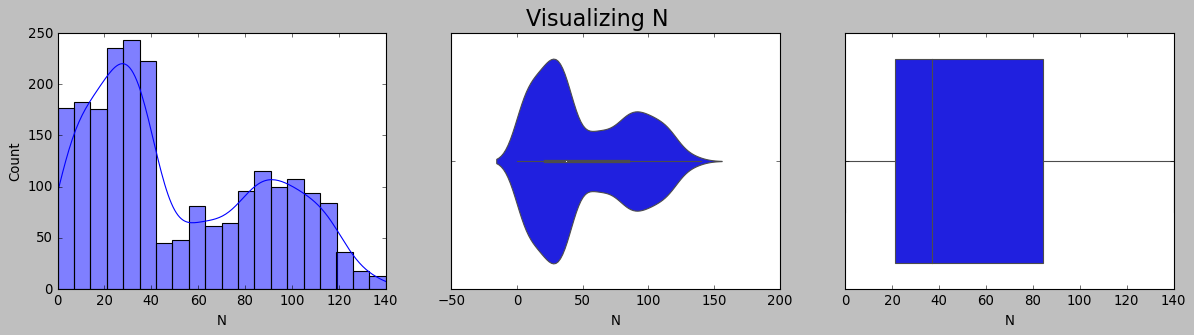

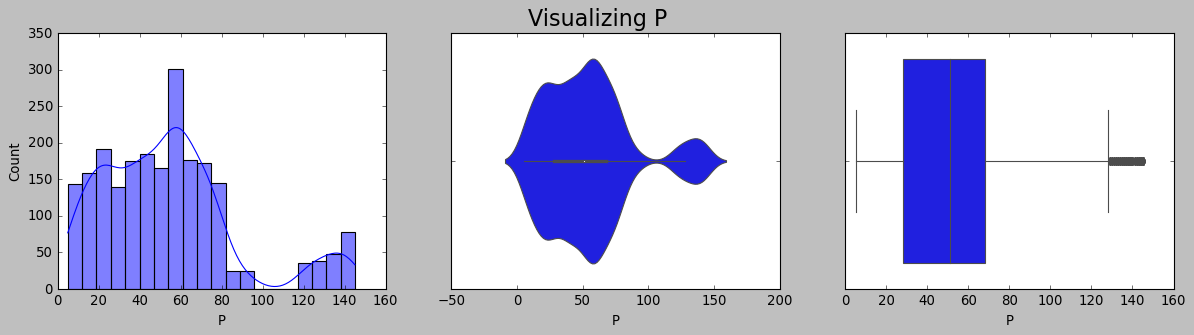

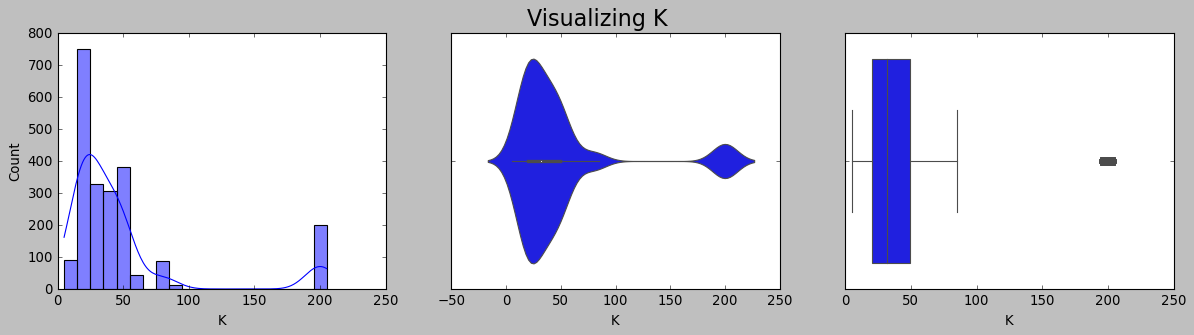

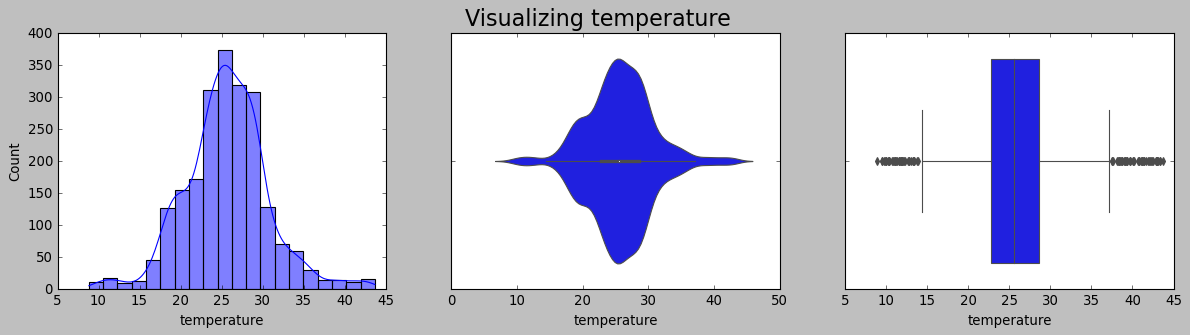

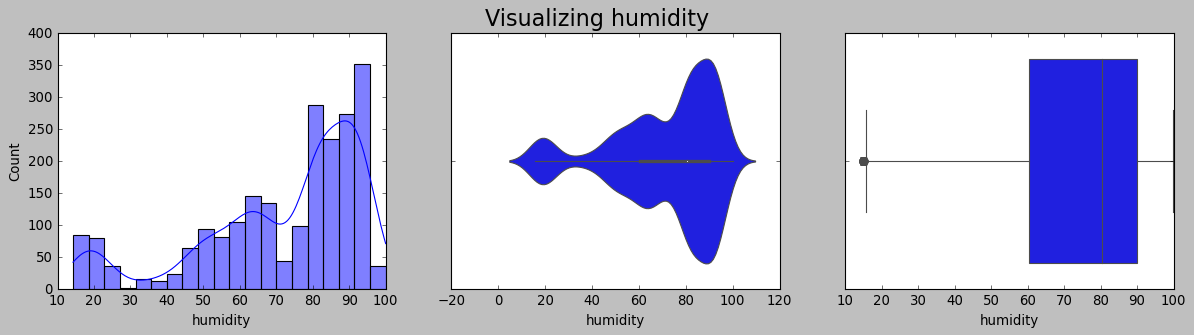

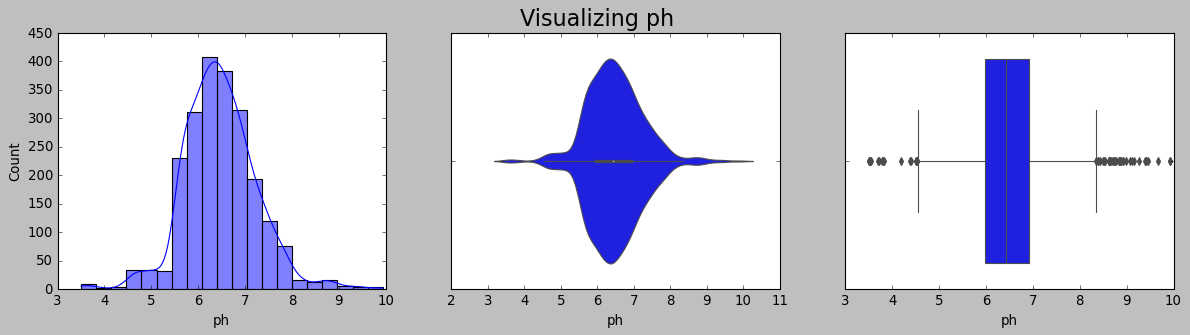

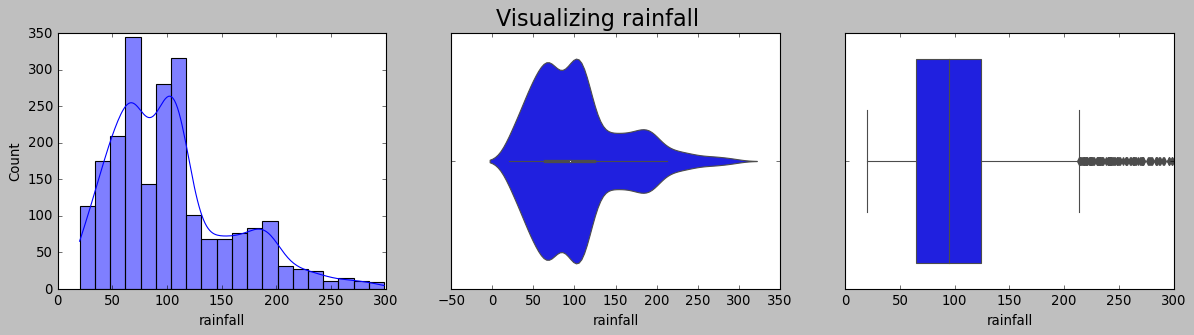

In [9]:

for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20,ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

#### These graphs confirm that there are outliers present in the data. Also it helps us understand the overall distribution of the dataset

In [10]:
grouped = df.groupby(by='label').mean().reset_index()

##### The <mark>GROUP BY</mark> statement groups rows that have the same values into summary rows.

In [11]:
grouped

label       N       P       K  temperature   humidity        ph  \
0         apple   20.80  134.22  199.89    22.630942  92.333383  5.929663   
1        banana  100.23   82.01   50.05    27.376798  80.358123  5.983893   
2     blackgram   40.02   67.47   19.24    29.973340  65.118426  7.133952   
3      chickpea   40.09   67.79   79.92    18.872847  16.860439  7.336957   
4       coconut   21.98   16.93   30.59    27.409892  94.844272  5.976562   
5        coffee  101.20   28.74   29.94    25.540477  58.869846  6.790308   
6        cotton  117.77   46.24   19.56    23.988958  79.843474  6.912675   
7        grapes   23.18  132.53  200.11    23.849575  81.875228  6.025937   
8          jute   78.40   46.86   39.99    24.958376  79.639864  6.732778   
9   kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
10       lentil   18.77   68.36   19.41    24.509052  64.804785  6.927932   
11        maize   77.76   48.44   19.79    22.389204  65.092249  6.245190   
12        mango   20.07   27.18   29.92    31.208770  50.156573  5.766373   
13    mothbeans   21.44   48.01   20.23    28.194920  53.160418  6.831174   
14     mungbean   20.99   47.28   19.87    28.525775  85.499975  6.723957   
15    muskmelon  100.32   17.72   50.08    28.663066  92.342802  6.358805   
16       orange   19.58   16.55   10.01    22.765725  92.170209  7.016957   
17       papaya   49.88   59.05   50.04    33.723859  92.403388  6.741442   
18   pigeonpeas   20.73   67.73   20.29    27.741762  48.061633  5.794175   
19  pomegranate   18.87   18.75   40.21    21.837842  90.125504  6.429172   
20         rice   79.89   47.58   39.87    23.689332  82.272822  6.425471   
21   watermelon   99.42   17.00   50.22    25.591767  85.160375  6.495778   

      rainfall  
0   112.654779  
1   104.626980  
2    67.884151  
3    80.058977  
4   175.686646  
5   158.066295  
6    80.398043  
7    69.611829  
8   174.792798  
9   105.919778  
10   45.680454  
11   84.766988  
12   94.704515  
13   51.198487  
14   48.403601  
15   24.689952  
16  110.474969  
17  142.627839  
18  149.457564  
19  107.528442  
20  236.181114  
21   50.786219

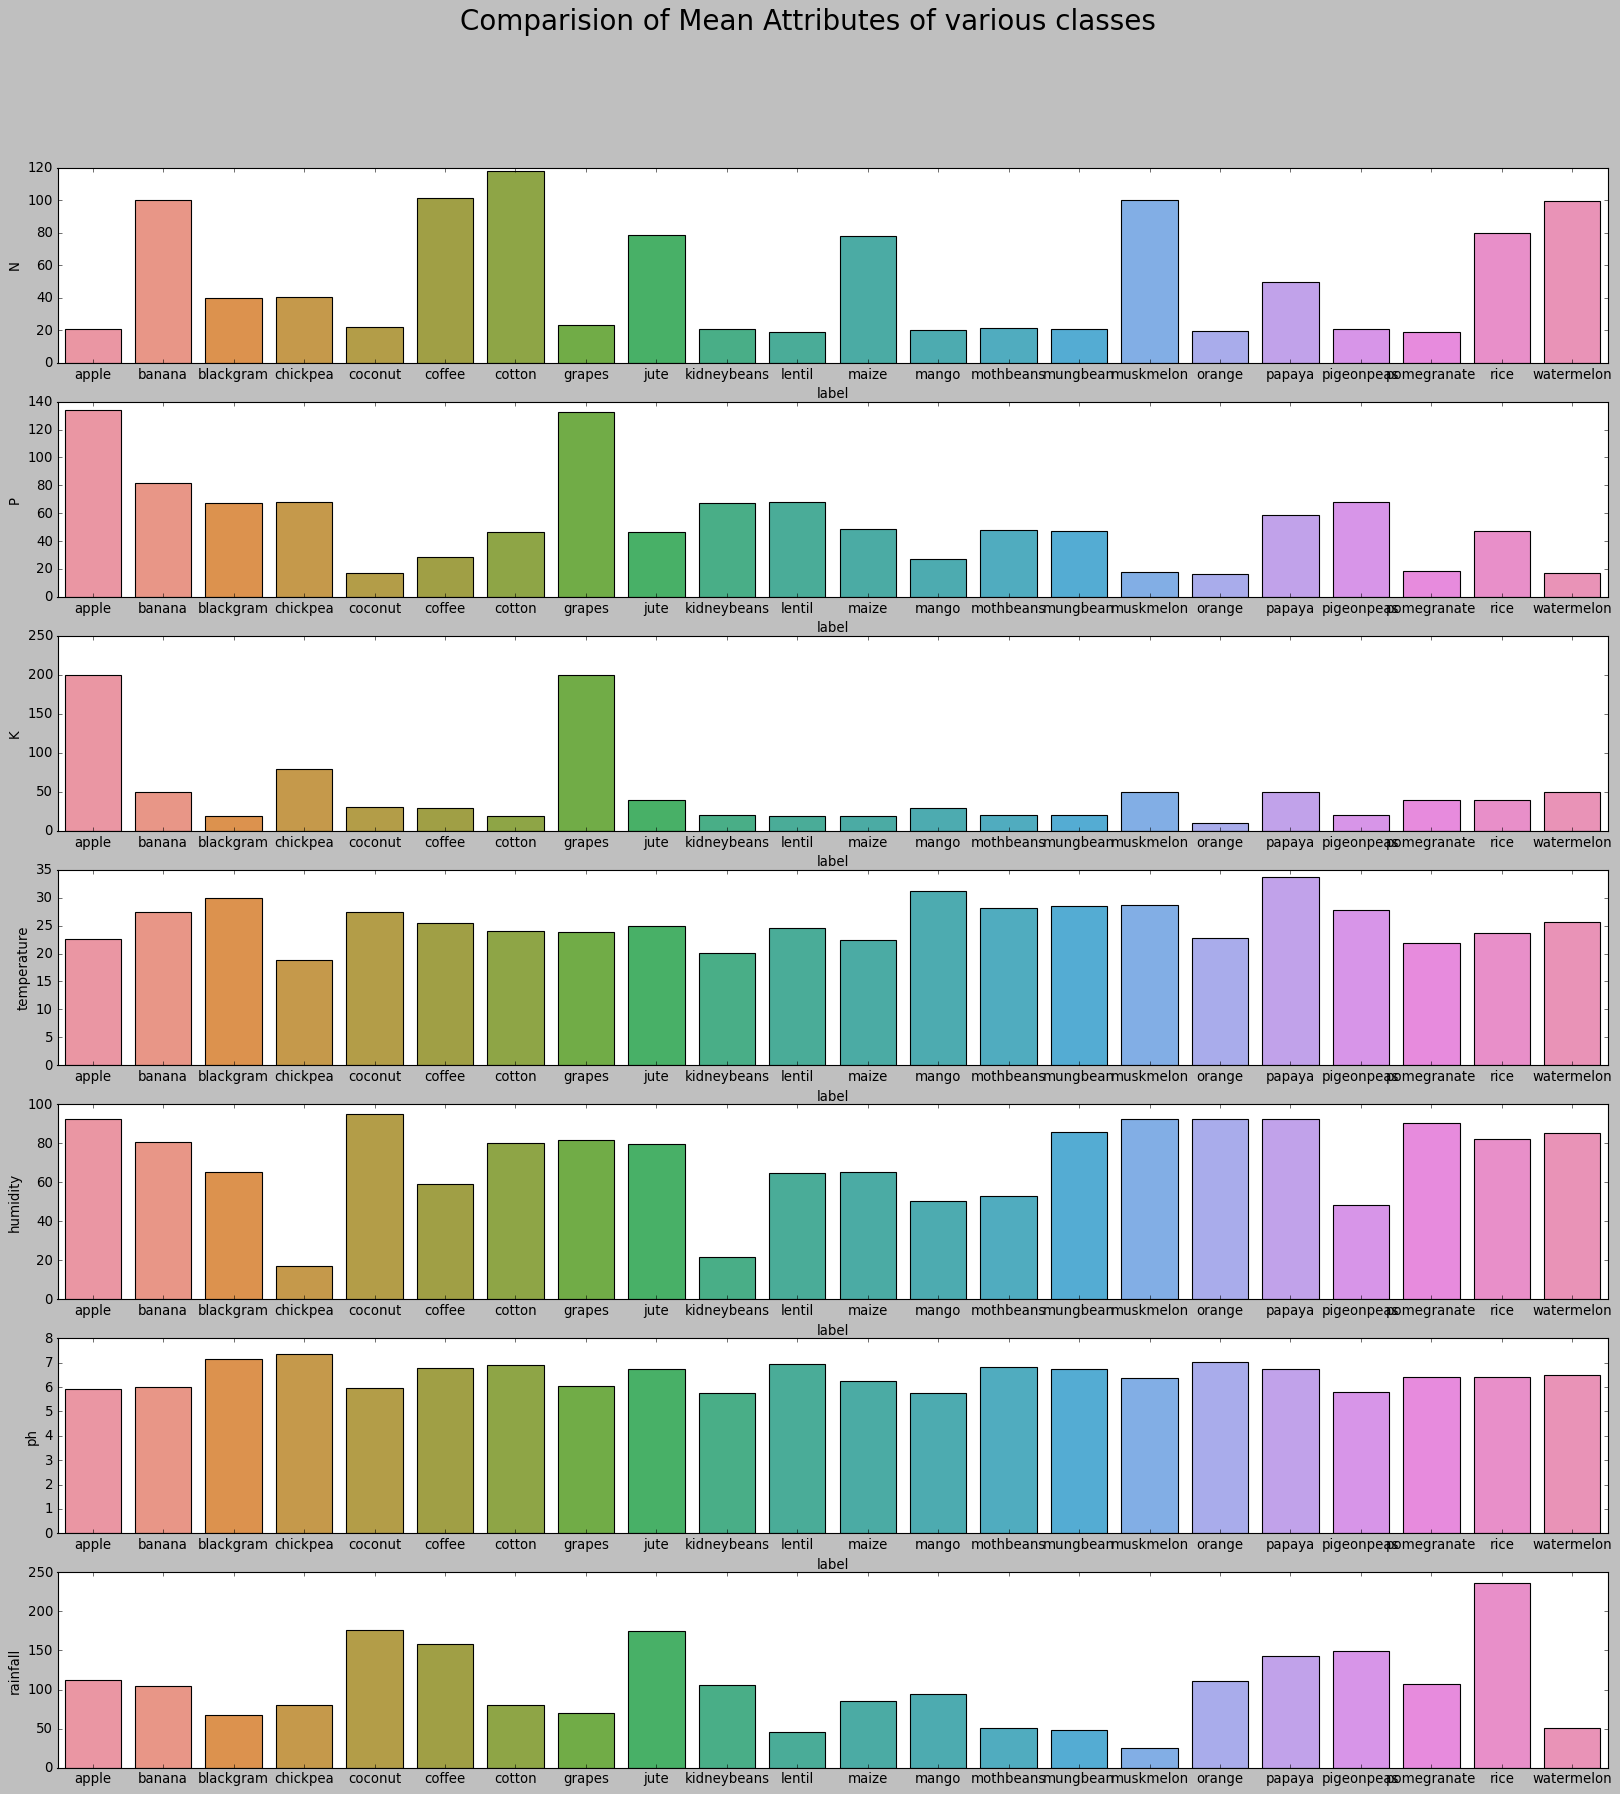

In [12]:
fig,ax=plt.subplots(7,1,figsize=(25,25))
for index,i in enumerate(grouped.columns[1:]):
    sns.barplot(data=grouped,x='label',y=i,ax=ax[index])
    plt.suptitle("Comparision of Mean Attributes of various classes",size=25)
    plt.xlabel("")

#### Observations:
* Cotton requires most Nitrogen.
* Apple requires most Phosphorus.
* Grapes require most Potassium.
* Papaya requires a hot climate.
* Coconut requires a humid climate.
* Chickpea requires high pH in soil.
* Rice requires huge amount of Rainfall.
---------------------------------------------
### Top 5 most and Top 5 Least requiring crops :

In [13]:
print(f'--------------------------------')
for i in grouped.columns[1:]:
    print(f'Top 5 Most {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in grouped.sort_values(by=i,ascending=False)[:5][['label',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')

--------------------------------
Top 5 Most N requiring crops:
--------------------------------
cotton --> 117.77
coffee --> 101.2
muskmelon --> 100.32
banana --> 100.23
watermelon --> 99.42
-------------------------------
Top 5 Most P requiring crops:
--------------------------------
apple --> 134.22
grapes --> 132.53
banana --> 82.01
lentil --> 68.36
chickpea --> 67.79
-------------------------------
Top 5 Most K requiring crops:
--------------------------------
grapes --> 200.11
apple --> 199.89
chickpea --> 79.92
watermelon --> 50.22
muskmelon --> 50.08
-------------------------------
Top 5 Most temperature requiring crops:
--------------------------------
papaya --> 33.7238587388
mango --> 31.2087701513
blackgram --> 29.9733396789
muskmelon --> 28.663065756
mungbean --> 28.5257747353
-------------------------------
Top 5 Most humidity requiring crops:
--------------------------------
coconut --> 94.84427180610001
papaya --> 92.4033876826
muskmelon --> 92.34280196089999
apple --> 9

In [14]:
print(f'--------------------------------')
for i in grouped.columns[1:]:
    print(f'Top 5 Least {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in grouped.sort_values(by=i)[:5][['label',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')

--------------------------------
Top 5 Least N requiring crops:
--------------------------------
lentil --> 18.77
pomegranate --> 18.87
orange --> 19.58
mango --> 20.07
pigeonpeas --> 20.73
-------------------------------
Top 5 Least P requiring crops:
--------------------------------
orange --> 16.55
coconut --> 16.93
watermelon --> 17.0
muskmelon --> 17.72
pomegranate --> 18.75
-------------------------------
Top 5 Least K requiring crops:
--------------------------------
orange --> 10.01
blackgram --> 19.24
lentil --> 19.41
cotton --> 19.56
maize --> 19.79
-------------------------------
Top 5 Least temperature requiring crops:
--------------------------------
chickpea --> 18.8728467519
kidneybeans --> 20.1150846851
pomegranate --> 21.837841721999997
maize --> 22.3892039102
apple --> 22.6309424132
-------------------------------
Top 5 Least humidity requiring crops:
--------------------------------
chickpea --> 16.8604394237
kidneybeans --> 21.6053567295
pigeonpeas --> 48.0616330847

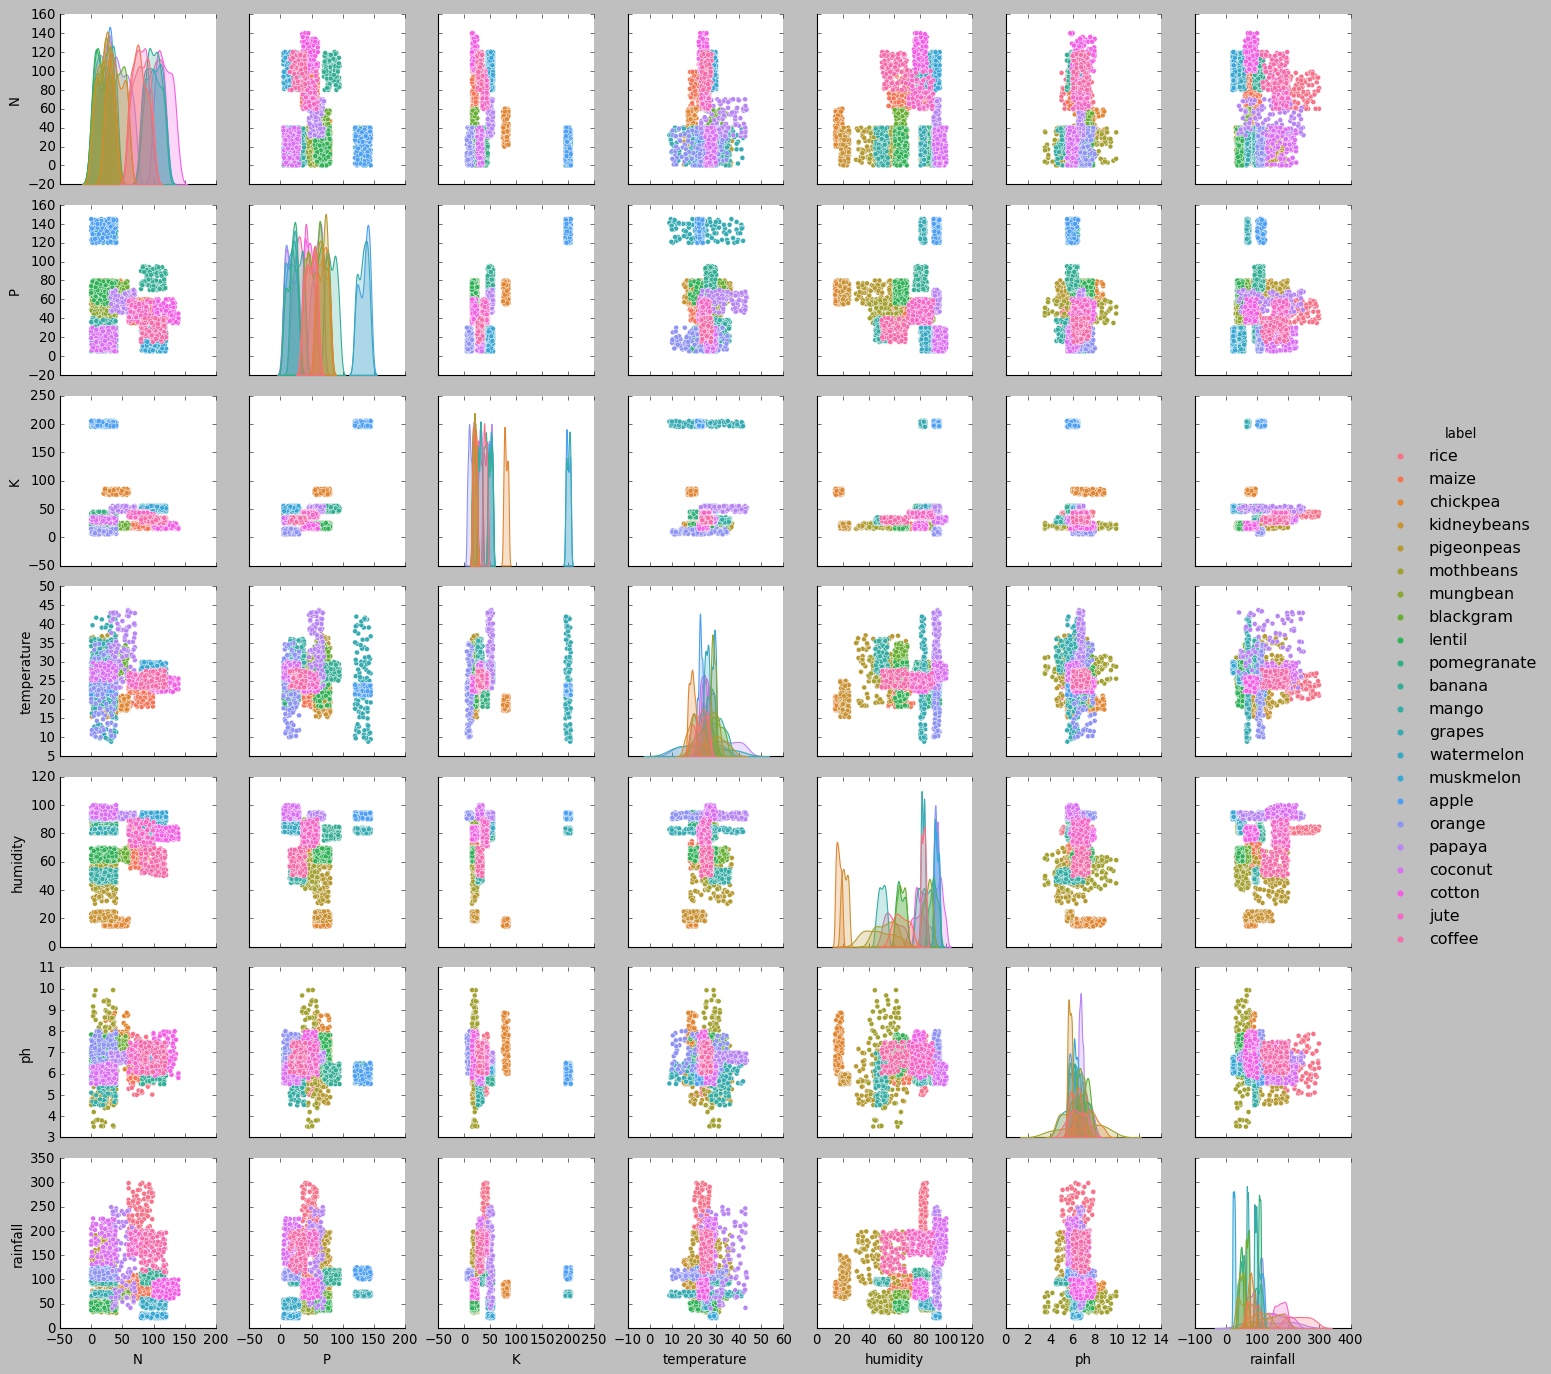

In [15]:
sns.pairplot(data=df,hue='label')
plt.show()

<AxesSubplot:>

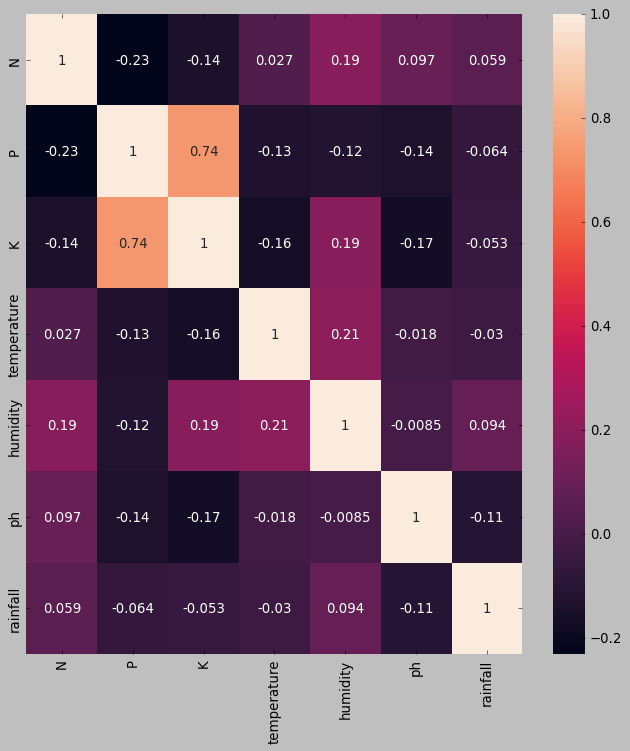

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

##### A <mark>strong positive correlation</mark> between Potassium and Phosphorus is observed.

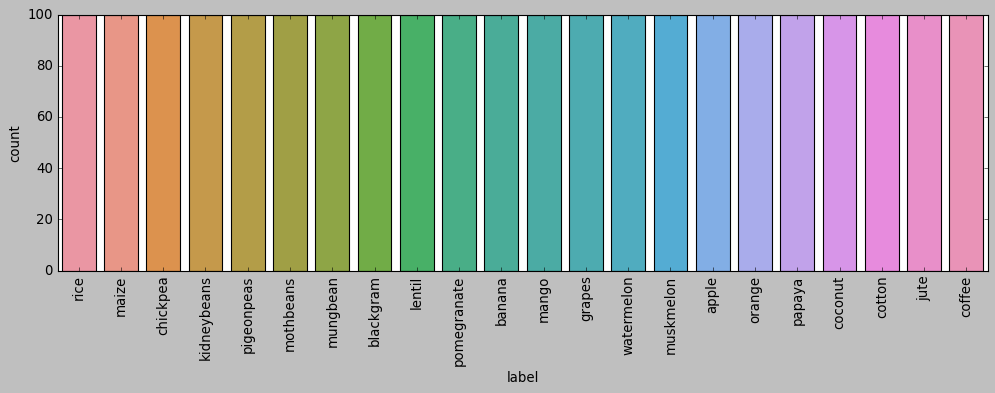

In [17]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x='label')
plt.xticks(rotation = 90)
plt.show()

#### The classes are balanced. Accuracy- Would be a good metric.
----------------------
### More Visualizations using PCA

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df.drop(['label'],axis=1))
df_pca=pd.DataFrame(df_pca)
fig = px.scatter(x=df_pca[0],y=df_pca[1],color=df['label'],title="Decomposed using PCA")
fig.show()

In [19]:
pca3=PCA(n_components=3)
df_pca3=pca3.fit_transform(df.drop(['label'],axis=1))
df_pca3=pd.DataFrame(df_pca3)
fig = px.scatter_3d(x=df_pca3[0],y=df_pca3[1],z=df_pca3[2],color=df['label'],title=f"Variance Explained : {pca3.explained_variance_ratio_.sum() * 100}%")
fig.show()

In [20]:
fig = px.scatter(x=df['N'],y=df['P'],color=df['label'],title="Nitrogen VS Phosphorus")
fig.show()

In [21]:
fig = px.scatter(x=df['P'],y=df['K'],color=df['label'],title="Phosphorus VS Potassium")
fig.show()

<h1><b>3 <span style='color:#19d063;'>|</span> Data Preprocessing</b></h1>

In [22]:
#would be required in future to get the names of crops back from encoded form
names = df['label'].unique()

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['label']=encoder.fit_transform(df['label'])
df.head()

N   P   K  temperature   humidity        ph    rainfall  label
0  90  42  43    20.879744  82.002744  6.502985  202.935536     20
1  85  58  41    21.770462  80.319644  7.038096  226.655537     20
2  60  55  44    23.004459  82.320763  7.840207  263.964248     20
3  74  35  40    26.491096  80.158363  6.980401  242.864034     20
4  78  42  42    20.130175  81.604873  7.628473  262.717340     20

##### Here I have encoded the target values to its respective numerical value. It is necessary because our machine learning model won't be able to understand strings!

In [24]:
X=df.drop(['label'],axis=1)
y=df['label']

In [25]:
#Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 42,stratify=y)

##### Parameters and its use:
* test_size = Denotes what proportion of total samples should be given to testing set - Here 30%.
* shuffle - The dataset contains all the classes and its samples one after one. So it is necessary to shuffle the dataset to avoid any bias.
* random_state - To produce replicable results.
* stratify - It makes even distribution of the classes between train and test set.

### Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_train.head()

N         P         K  temperature  humidity        ph  rainfall
0 -1.335936  0.417499 -0.535091     0.378274 -0.489416  0.105457 -1.006138
1  1.797538  0.874355 -0.061709    -0.056432  0.352421 -1.102431  0.037615
2 -1.308923  0.234757 -0.554816    -0.672000 -2.173304 -0.662710 -0.486121
3 -0.282441  0.752527 -0.554816    -1.248506 -2.271540 -1.031842 -0.422218
4 -1.173860 -1.013983 -0.712610    -1.765899  1.047107  0.007107  0.121738

In [27]:
X_test=scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)
X_test.head()

N         P         K  temperature  humidity        ph  rainfall
0 -1.065809  0.752527 -0.515367    -0.328943 -2.185815 -0.682134  0.169358
1 -1.038796 -0.435299 -0.535091     0.665518 -0.385148  2.209376 -0.598399
2 -0.741657  0.112928 -0.574540     1.416190 -0.154494  1.006982 -0.545022
3  0.257813  0.143385 -0.219503     0.108439  0.344686 -0.518753  1.239871
4  0.446902 -0.374384 -0.160330     0.051858  0.735100  1.112860  0.896488

<h1><b>4 <span style='color:#19d063;'>|</span> Model Building</b></h1>

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | KNeighborsClassifier - 98%</b></p>
</div>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

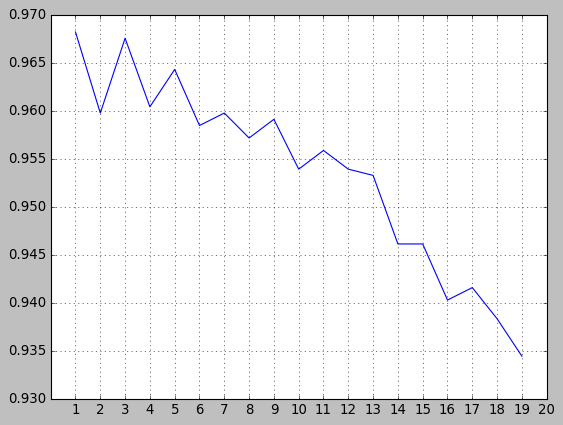

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.93      0.93      0.93        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.94      1.00      0.97        30
           7       1.00      1.00      1.00        30
           8       0.86      1.00      0.92        30
           9       0.97      1.00      0.98        30
          10       0.90      0.90      0.90        30
          11       1.00      0.93      0.97        30
          12       0.97      1.00      0.98        30
          13       0.97      0.93      0.95        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

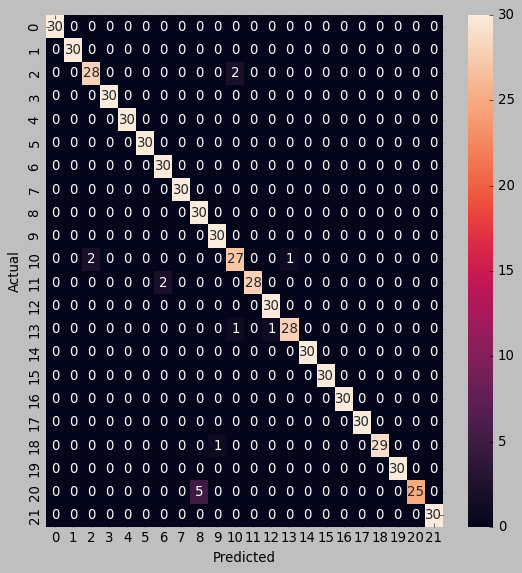

In [29]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

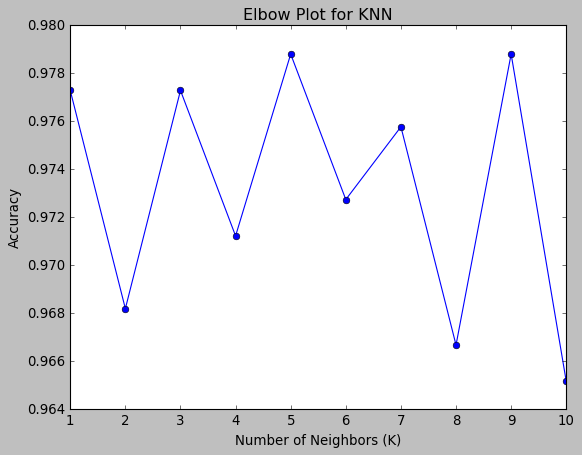

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define a range of K values
k_values = range(1, 11)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Elbow Plot for KNN')
plt.show()


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Support Vector Classifier - 99%</b></p>
</div>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.97      1.00      0.98        30
           7       1.00      1.00      1.00        30
           8       0.91      1.00      0.95        30
           9       1.00      1.00      1.00        30
          10       1.00      0.97      0.98        30
          11       1.00      0.97      0.98        30
          12       1.00      1.00      1.00        30
          13       0.97      1.00      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

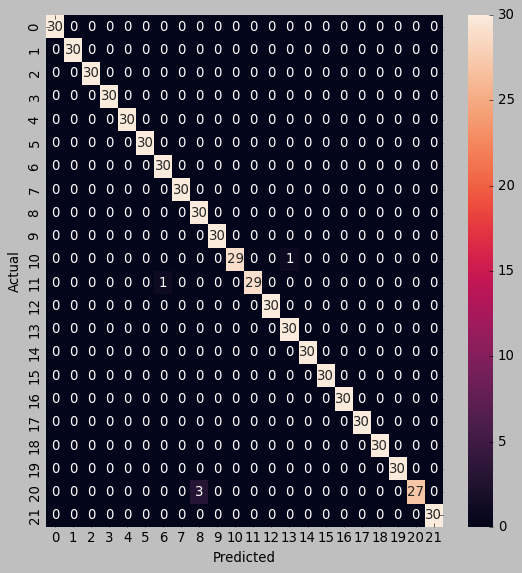

In [31]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Logistic Regression - 98%</b></p>
</div>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.97      1.00      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.97      0.97      0.97        30
           7       1.00      1.00      1.00        30
           8       0.88      1.00      0.94        30
           9       1.00      1.00      1.00        30
          10       0.97      0.97      0.97        30
          11       0.97      0.97      0.97        30
          12       1.00      1.00      1.00        30
          13       0.97      0.97      0.97        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

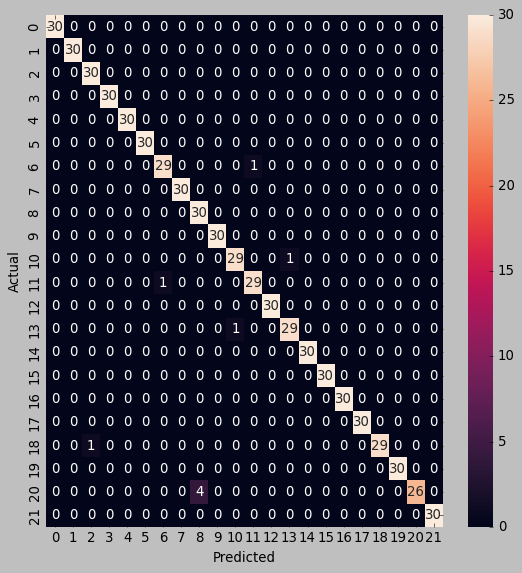

In [32]:
import warnings 
warnings.filterwarnings('ignore')
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Random Forest Classifier - 99%</b></p>
</div>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      0.97      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.94      1.00      0.97        30
           9       1.00      1.00      1.00        30
          10       1.00      0.97      0.98        30
          11       0.97      1.00      0.98        30
          12       1.00      1.00      1.00        30
          13       0.97      1.00      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

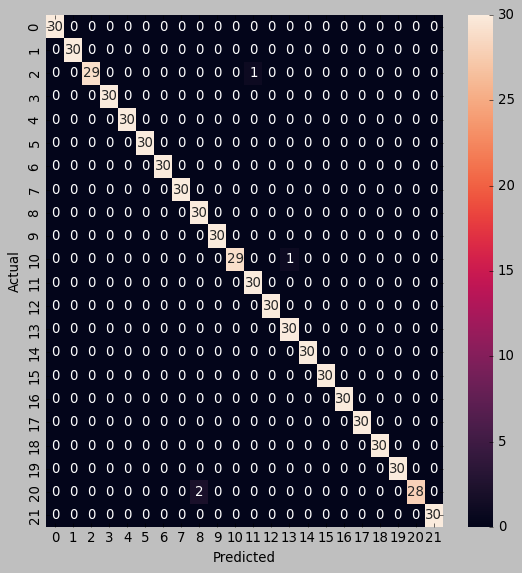

In [33]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))